# Importing Required Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [4]:
df=pd.read_excel('Real estate valuation data set.xlsx')

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#getting the names of columns
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
df.shape

(414, 8)

In [7]:
df.skew()

No                                        0.000000
X1 transaction date                      -0.150834
X2 house age                              0.382926
X3 distance to the nearest MRT station    1.888757
X4 number of convenience stores           0.154607
X5 latitude                              -0.438598
X6 longitude                             -1.219591
Y house price of unit area                0.599853
dtype: float64

In [8]:
 df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Exploratory Data Analysis

In [9]:
#Global declartions of function names
global Head
global Size
global Column_names
global Describe
global Shape
global Count
global Value_count
global ISNULL
global Tail
global Ndim
global Nunique
global Memory_usage
global Duplicated
global ISNA
global DTYPES
global CORR
global Info
global operations
        

        

In [10]:
 def Head(value=5):
            print('\033[1m'+'displaying the', value, 'rows'+'\033[0m')
            a=df.head(value)
            return a
            print("--------------------------------------------------------------------------")
Head()

displaying the 5 rows


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
 def Tail():
    print('\033[1m'+"The last five rows of the dataframe are"+'\033[0m')
    co3=df.tail()
    return(co3)
    print("--------------------------------------------------------------------------")
Tail()

The last five rows of the dataframe are


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [12]:
def Describe():
    print('\033[1m'+"The Description of our dataset is:"+'\033[0m')
    des=df.describe()
    return(des)
    print("--------------------------------------------------------------------------")
Describe()

The Description of our dataset is:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [13]:
def Size():
    print('\033[1m'+"The size of dataset is :"+'\033[0m')
    siz=df.size
    print(siz,'\n')
    print("--------------------------------------------------------------------------")
Size()

The size of dataset is :
3312 

--------------------------------------------------------------------------


In [14]:
def Count():
    print('\033[1m'+"The count of non null values are:"+'\033[0m')
    co=df.count()
    print(co,'\n')
    print("--------------------------------------------------------------------------")
Count()


The count of non null values are:
No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64 

--------------------------------------------------------------------------


In [15]:
def ISNULL():
    print('\033[1m'+"Detection of missing values"+'\033[0m')
    co2=df.isnull().sum()
    print(co2,'\n')
    print("--------------------------------------------------------------------------")
ISNULL()

Detection of missing values
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64 

--------------------------------------------------------------------------


In [16]:
def Ndim():
    print('\033[1m'+"The dimensions of data set are:"+'\033[0m')
    co4=df.ndim
    print(co4,'\n')
    print("--------------------------------------------------------------------------")
Ndim()

The dimensions of data set are:
2 

--------------------------------------------------------------------------


In [17]:
def Nunique():
    print('\033[1m'+"Total number of unique values are:"+'\033[0m')
    co5=df.nunique()
    print(co5,'\n')
    print("--------------------------------------------------------------------------")
Nunique()

Total number of unique values are:
No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64 

--------------------------------------------------------------------------


In [18]:
def Memory_usage():
    print('\033[1m'+"The total memory used is :"+'\033[0m')
    co6=df.memory_usage()
    print(co6,'\n')
    print("--------------------------------------------------------------------------")
Memory_usage()

The total memory used is :
Index                                      128
No                                        3312
X1 transaction date                       3312
X2 house age                              3312
X3 distance to the nearest MRT station    3312
X4 number of convenience stores           3312
X5 latitude                               3312
X6 longitude                              3312
Y house price of unit area                3312
dtype: int64 

--------------------------------------------------------------------------


In [19]:
def Duplicated():
    print('\033[1m'+"Total number of duplicate rows"+'\033[0m')
    co7=df.duplicated().count()
    return(co7)
    print("--------------------------------------------------------------------------")
Duplicated()

Total number of duplicate rows


414

In [20]:
def DTYPES():
    print('\033[1m'+"The datatypes are :"+'\033[0m')
    co9=df.dtypes
    print(co9,'\n')
    print("--------------------------------------------------------------------------")
DTYPES()

The datatypes are :
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object 

--------------------------------------------------------------------------


In [21]:
def Info():
    print('\033[1m'+"The info of data set is :"+'\033[0m')
    co11=df.info()
    print("--------------------------------------------------------------------------")
Info()

The info of data set is :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
--------------------------------------------------------------------------


In [22]:
def operations(df,x):
    if df[x].dtype=="float64":
        print('\033[1m'+'', x, 'rows'+'\033[0m')
        print('\033[1m'+"It is a quantitaive data \n"+'\033[0m')
        print("The mean is :\n",df[x].mean())
        print("The median is :\n",df[x].median())
        print("The Standard Deviation is \n",df[x].std())
        q1=df[x].quantile(0.25)
        q2=df[x].quantile(0.5)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        LLP=q1-1.5*IQR
        ULP=q3+1.5*IQR
        print("The quartiles are q1 : \n",q1)
        print("The quartiles are q2 : \n",q2)
        print("The quartiles are q3 :\n ",q3)
        print("The Uppler limit point of the data is \n",ULP)
        print("The lower limit point of the data is \n ",LLP)
        if df[x].min()>LLP and df[x].max()<ULP:
            print("The outliers are not present \n")
            print("--------------------------------------------------------------------------")

        else:

            print("The outliers are present \n")
            print("The outliers are :")
            print(df[df[x].values>ULP][x])
            print(df[df[x].values<LLP][x])

            print("--------------------------------------------------------------------------")


    elif df[x].dtype=="int64":
        print('\033[1m'+'', x, 'rows'+'\033[0m')
        print('\033[1m'+"It is a quantitaive data \n"+'\033[0m')
        print("The mean is : \n",df[x].mean())
        print("The median is : \n",df[x].median())
        print("The Standard Deviation is \n",df[x].std())
        q1=df[x].quantile(0.25)
        q2=df[x].quantile(0.5)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        LLP=q1-1.5*IQR
        ULP=q3+1.5*IQR
        print("The quartiles are q1 : \n",q1)
        print("The quartiles are q2 : \n",q2)
        print("The quartiles are q3 : \n",q3)
        print("The Uppler limit point of the data is \n",ULP)
        print("The lower limit point of the data is \n",LLP)
        if df[x].min()>LLP and df[x].max()<ULP:
            print("The outliers are not present \n")

            print("--------------------------------------------------------------------------")

        else:

            print("The outliers are present \n")
            print("The outliers are :")
            print(df[df[x].values>ULP][x])
            print(df[df[x].values<LLP][x])
            print("--------------------------------------------------------------------------")







    else:

        print('\033[1m'+"The data is Qualitative \n"+'\033[0m')


        if df[x].nunique()==1:
            print('\033[1m'+"The data is singular \n"+'\033[0m')
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())
        elif df[x].nunique()==2:
            print('\033[1m'+"The data is Binary \n"+'\033[0m')
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())
        elif df[x].nunique()>2:
            print('\033[1m'+"The data is Multi \n"+'\033[0m')
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())

        print("--------------------------------------------------------------------------")

c=df.columns
for i in c:
    operations(df,i)
    print("\n")




 No rows
It is a quantitaive data 

The mean is : 
 207.5
The median is : 
 207.5
The Standard Deviation is 
 119.6557562342907
The quartiles are q1 : 
 104.25
The quartiles are q2 : 
 207.5
The quartiles are q3 : 
 310.75
The Uppler limit point of the data is 
 620.5
The lower limit point of the data is 
 -205.5
The outliers are not present 

--------------------------------------------------------------------------


 X1 transaction date rows
It is a quantitaive data 

The mean is :
 2013.148953302899
The median is :
 2013.1666667
The Standard Deviation is 
 0.28199532714223735
The quartiles are q1 : 
 2012.9166667
The quartiles are q2 : 
 2013.1666667
The quartiles are q3 :
  2013.4166667
The Uppler limit point of the data is 
 2014.1666667
The lower limit point of the data is 
  2012.1666667
The outliers are not present 

--------------------------------------------------------------------------


 X2 house age rows
It is a quantitaive data 

The mean is :
 17.71256038647343
The me

# Summary of EDA

In [23]:
def Summary():
        print('\033[1m'+"The Summary of data is  \n"+'\033[0m')
        print("The shape of the datset is :",df.shape)
        print("The sixe o the data set is :",df.size)
        print("The dimensions of the dataset are:",df.ndim)
        print("The memory usage of the data set are",df.memory_usage())
        print("The data types of the dataset are:",df.dtypes)
        print("--------------------------------------------------------------------------")

Summary()     

The Summary of data is  

The shape of the datset is : (414, 8)
The sixe o the data set is : 3312
The dimensions of the dataset are: 2
The memory usage of the data set are Index                                      128
No                                        3312
X1 transaction date                       3312
X2 house age                              3312
X3 distance to the nearest MRT station    3312
X4 number of convenience stores           3312
X5 latitude                               3312
X6 longitude                              3312
Y house price of unit area                3312
dtype: int64
The data types of the dataset are: No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house

In [24]:
 def Column_Summary():
        print('\033[1m'+"The Column wise Summary of data is  \n"+'\033[0m')
        k=df.columns
        for i in k:
            print('\033[1m'+'', i, 'rows'+'\033[0m')
            print("The Shape of the column ",i,"is ",df[i].shape)
            print("The Size of the column ",i,"is ",df[i].size)
            print("The Dimensions of the column ",i,"is ",df[i].ndim)
            print("The Memory used by the column ",i,"is ",df[i].memory_usage())
            print("The Data types  of the column ",i,"is ",df[i].dtypes)
            print("--------------------------------------------------------------------------")
Column_Summary()

The Column wise Summary of data is  

 No rows
The Shape of the column  No is  (414,)
The Size of the column  No is  414
The Dimensions of the column  No is  1
The Memory used by the column  No is  3440
The Data types  of the column  No is  int64
--------------------------------------------------------------------------
 X1 transaction date rows
The Shape of the column  X1 transaction date is  (414,)
The Size of the column  X1 transaction date is  414
The Dimensions of the column  X1 transaction date is  1
The Memory used by the column  X1 transaction date is  3440
The Data types  of the column  X1 transaction date is  float64
--------------------------------------------------------------------------
 X2 house age rows
The Shape of the column  X2 house age is  (414,)
The Size of the column  X2 house age is  414
The Dimensions of the column  X2 house age is  1
The Memory used by the column  X2 house age is  3440
The Data types  of the column  X2 house age is  float64
-------------------

# Data Visualization

In [25]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [26]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [27]:
a=df['X1 transaction date']

In [28]:
df['X1 transaction date'][0]

2012.9166667

In [29]:
for i in range(len(a)):
    df['X1 transaction date'][i]=int(df['X1 transaction date'][i])
    

<ipython-input-29-d2e56dd7a48a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X1 transaction date'][i]=int(df['X1 transaction date'][i])


In [30]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.0,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.0,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.0,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.0,8.1,104.81010,5,24.96674,121.54067,52.5


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


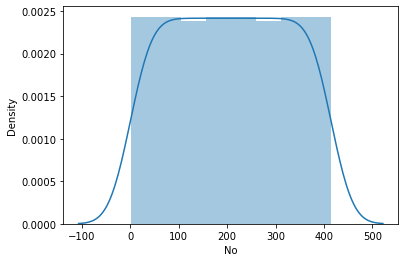

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


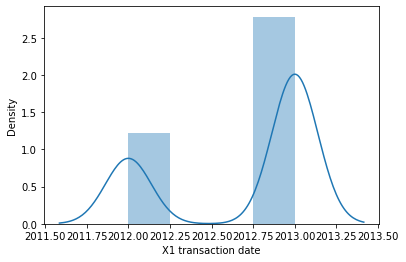

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


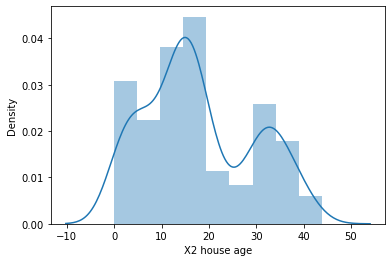

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


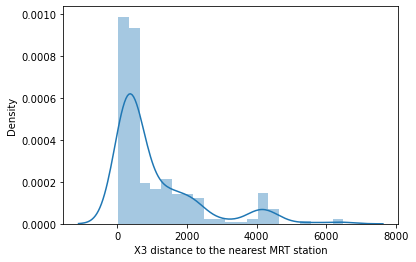

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


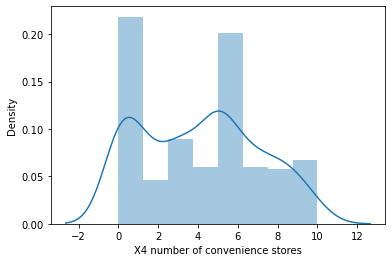

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


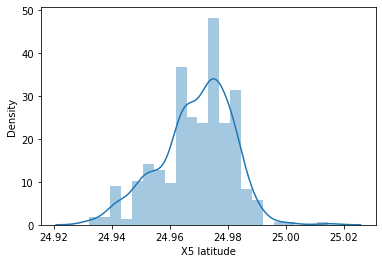

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


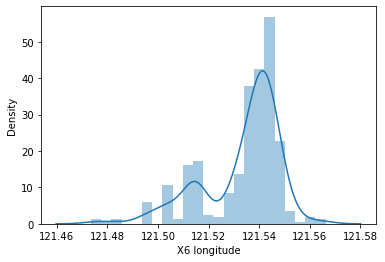

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


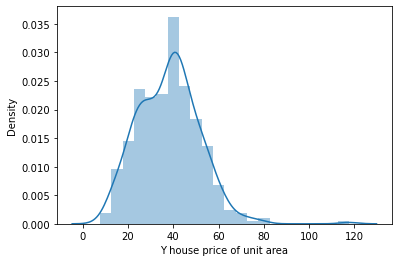

In [31]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    


# Relation Plots

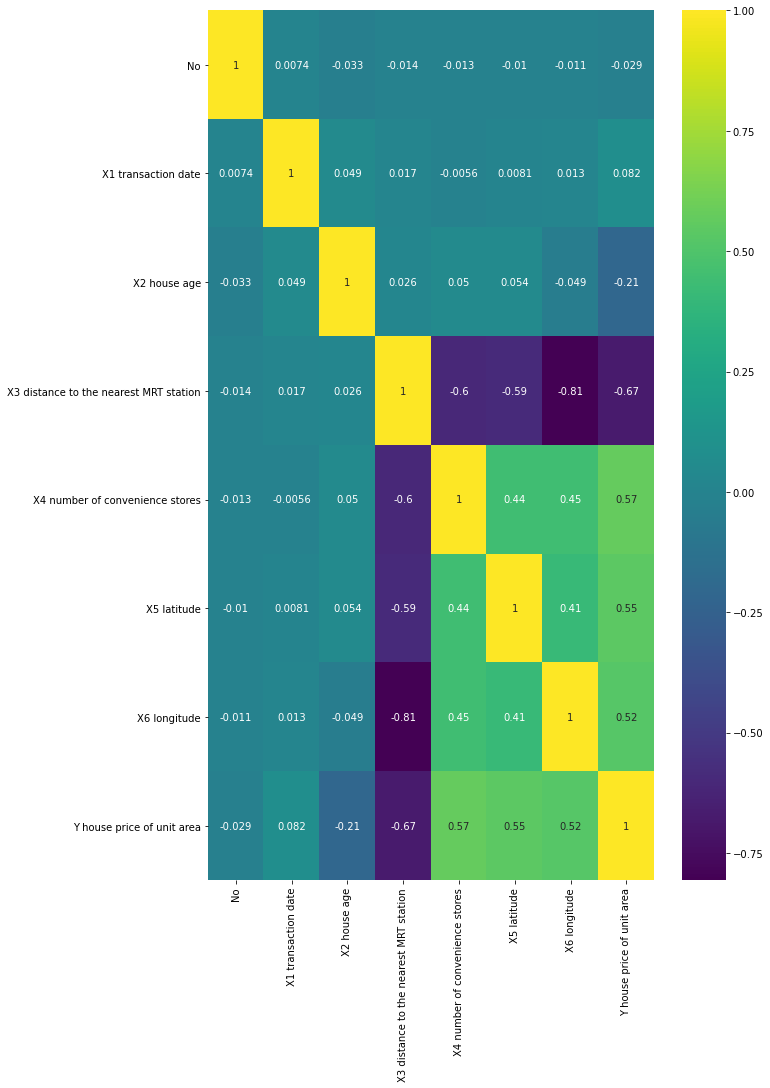

In [32]:
plt.figure(figsize=(10,16))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'viridis')
plt.show()


In [33]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (414, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


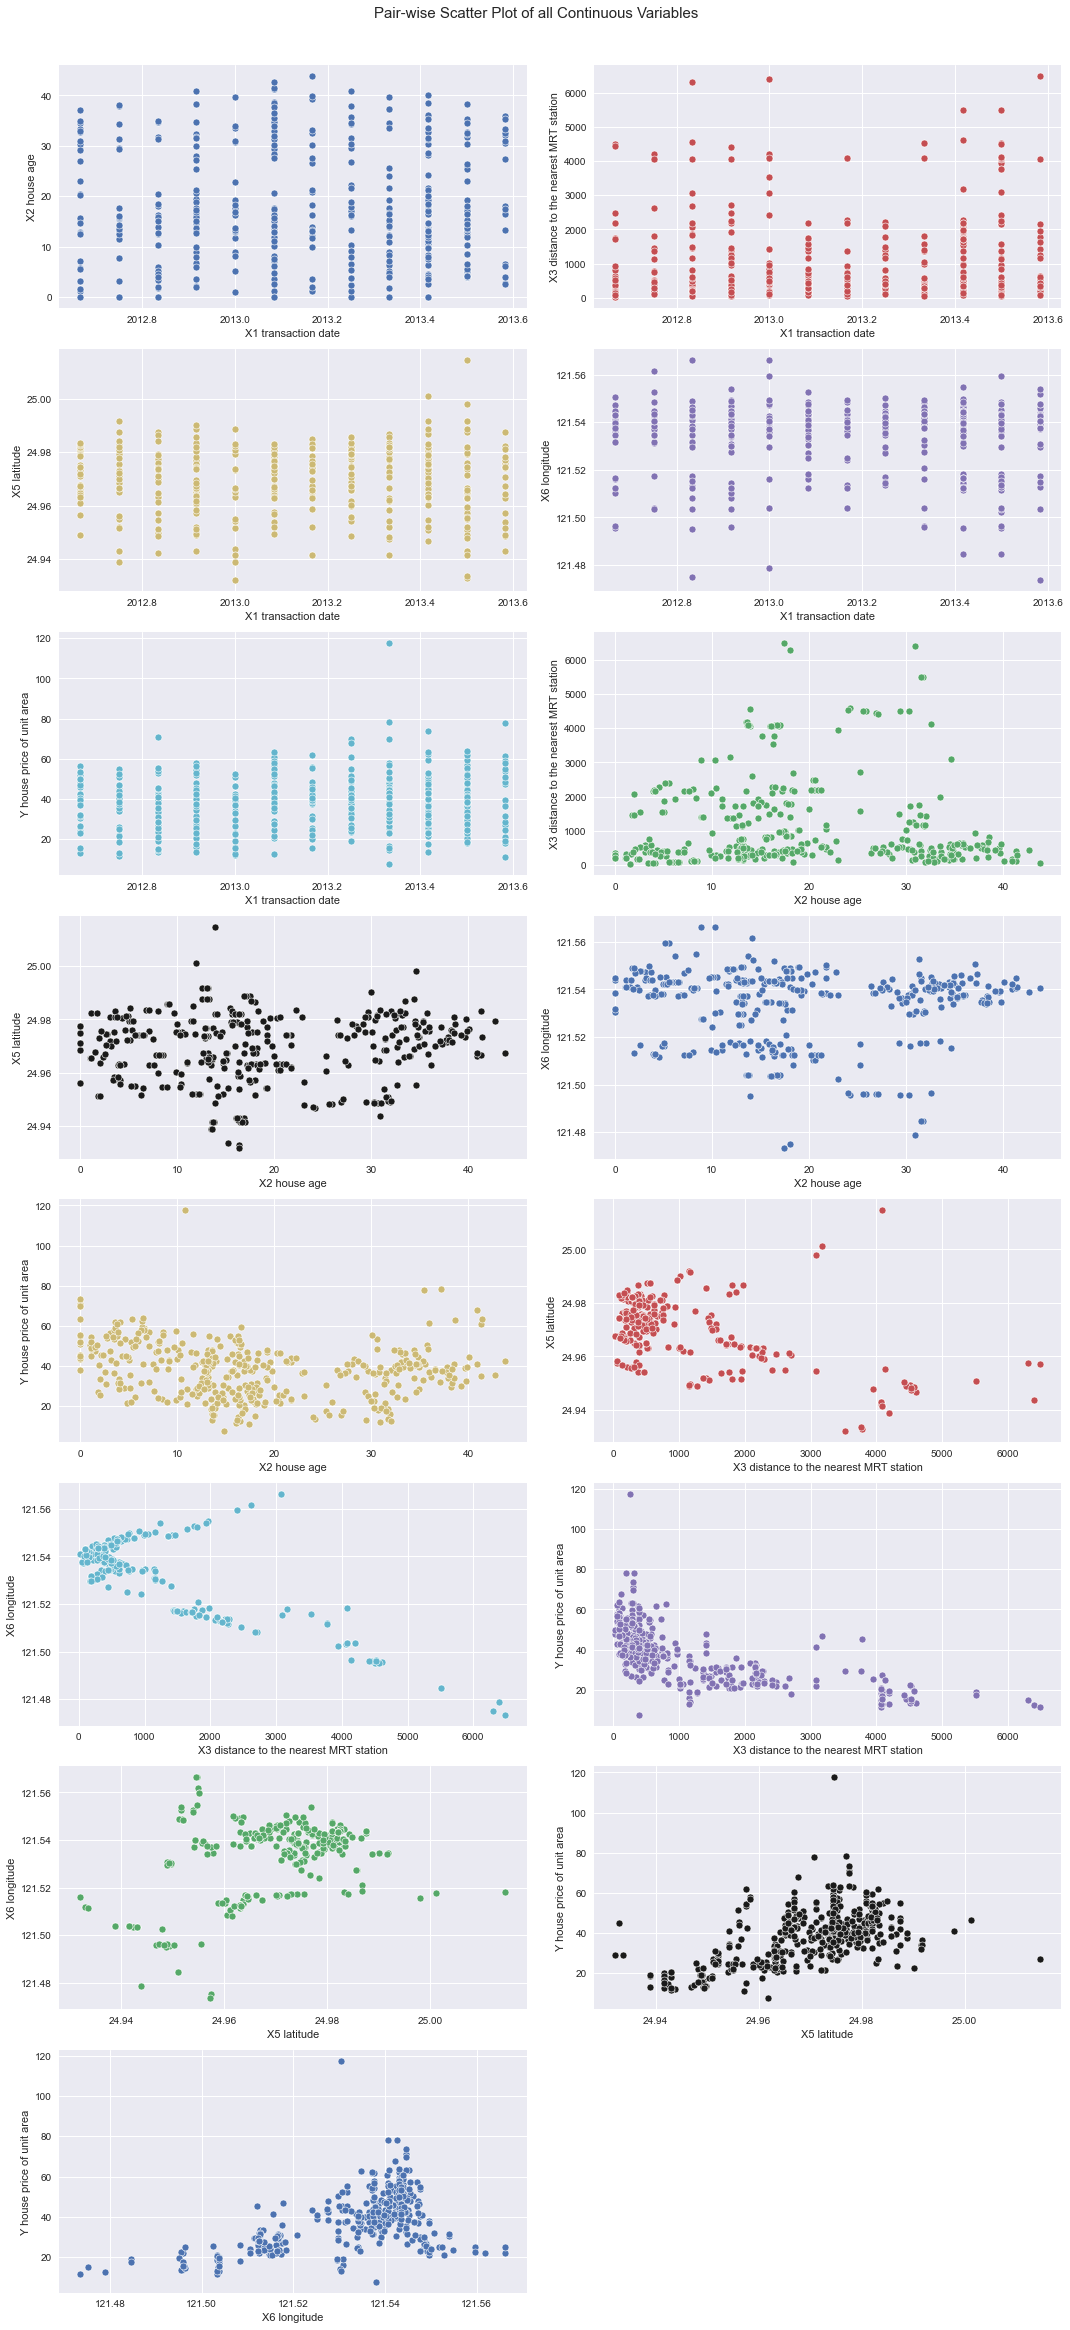

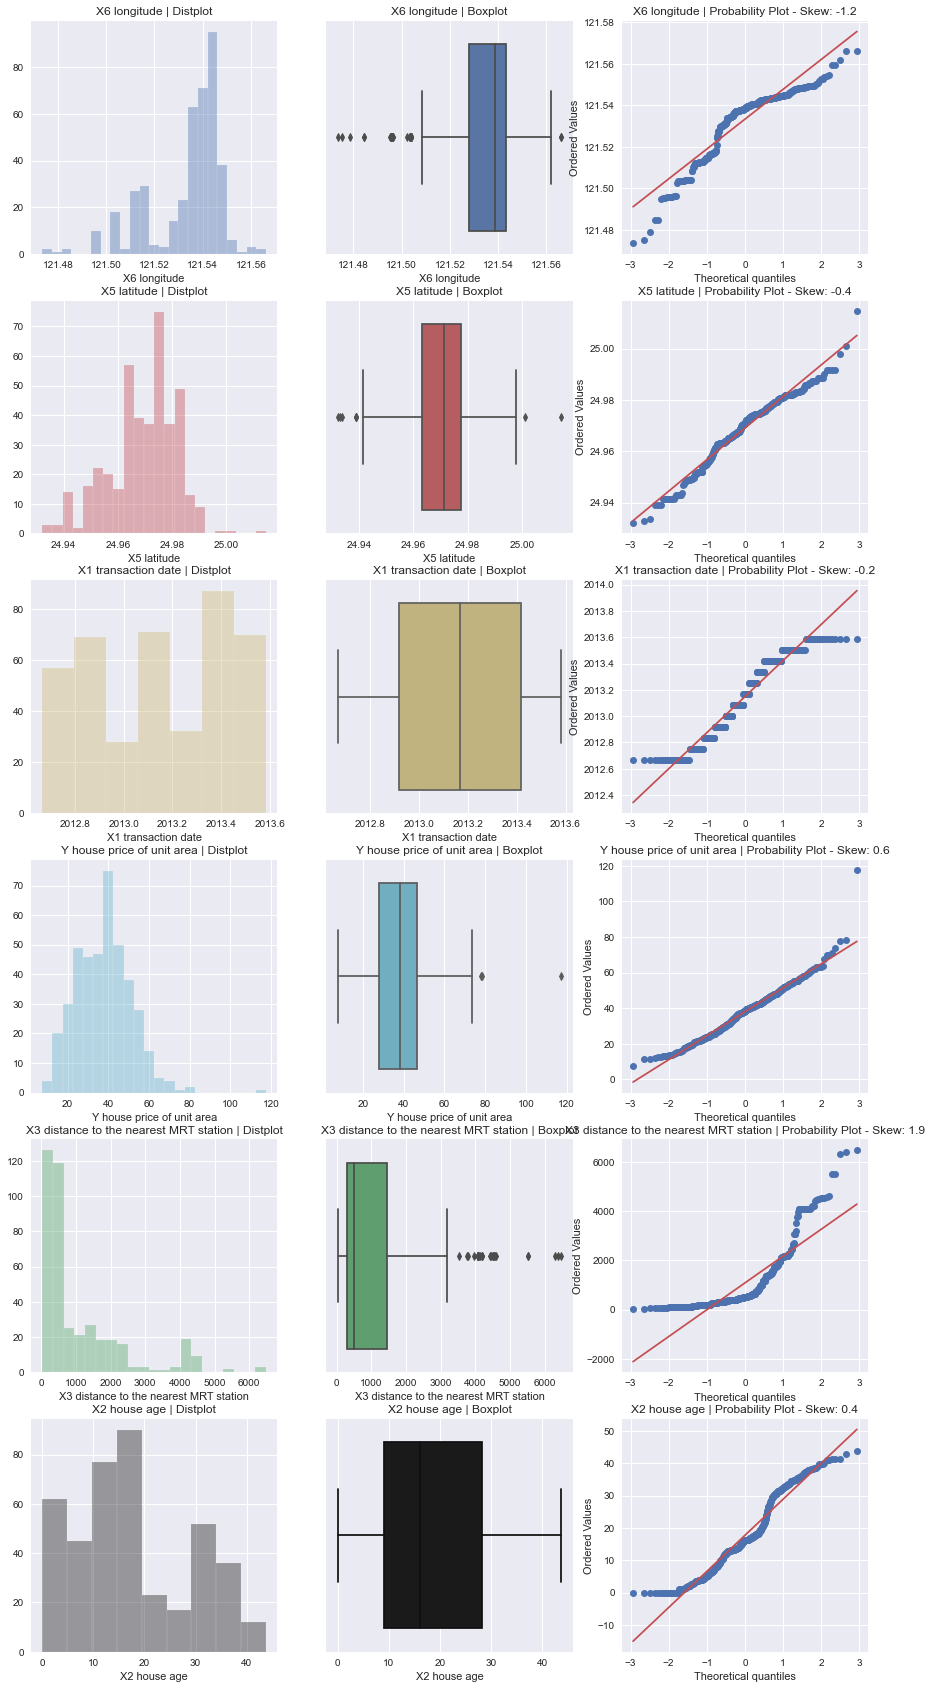

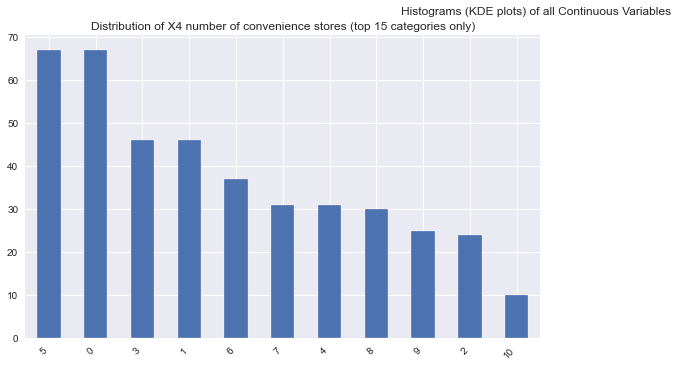

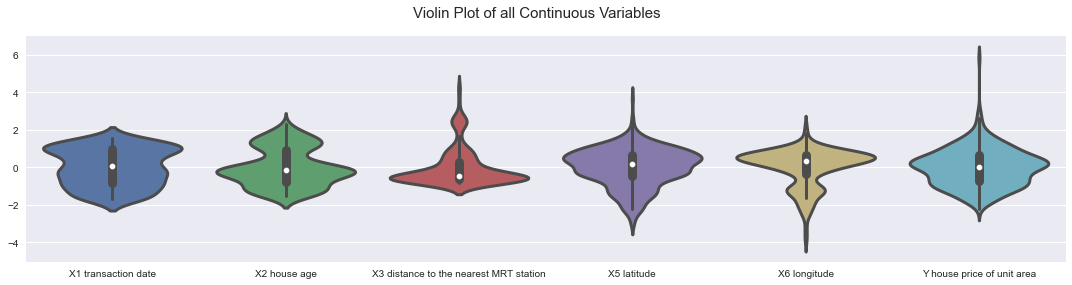

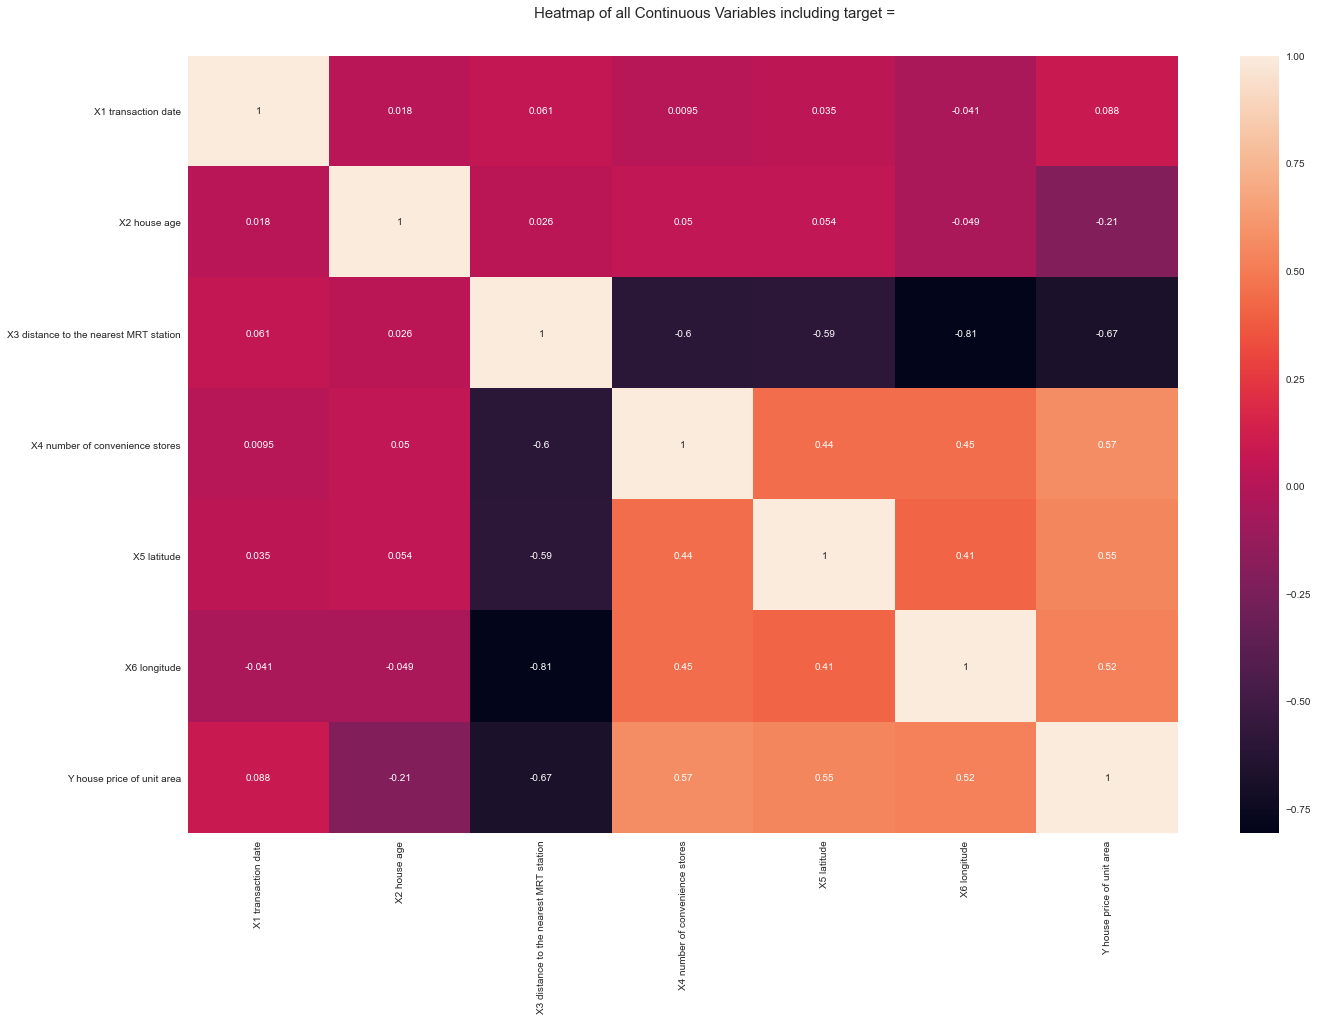

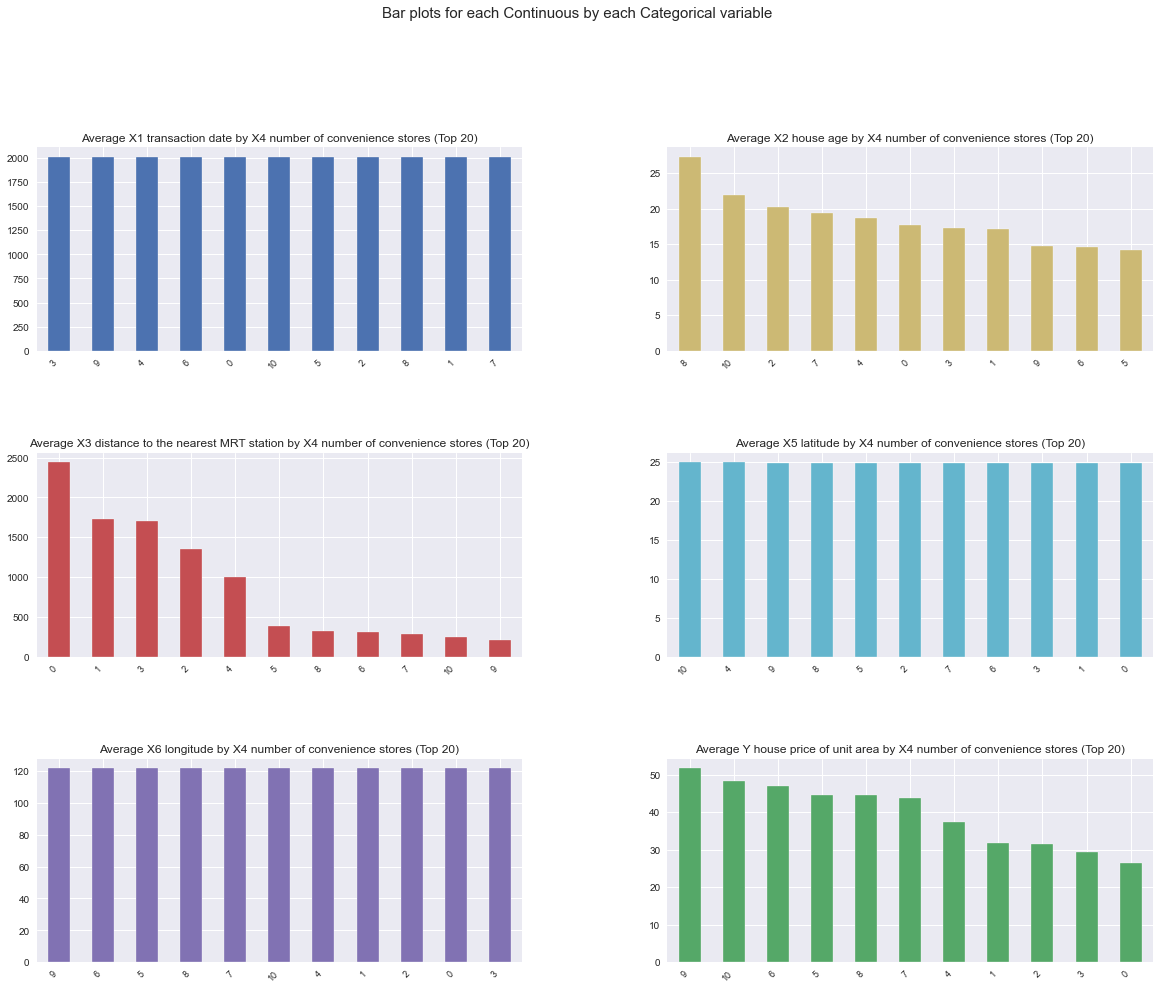

Time to run AutoViz (in seconds) = 9.383

 ###################### VISUALIZATION Completed ########################


In [34]:
df1 = AV.AutoViz('Real estate valuation data set.xlsx')

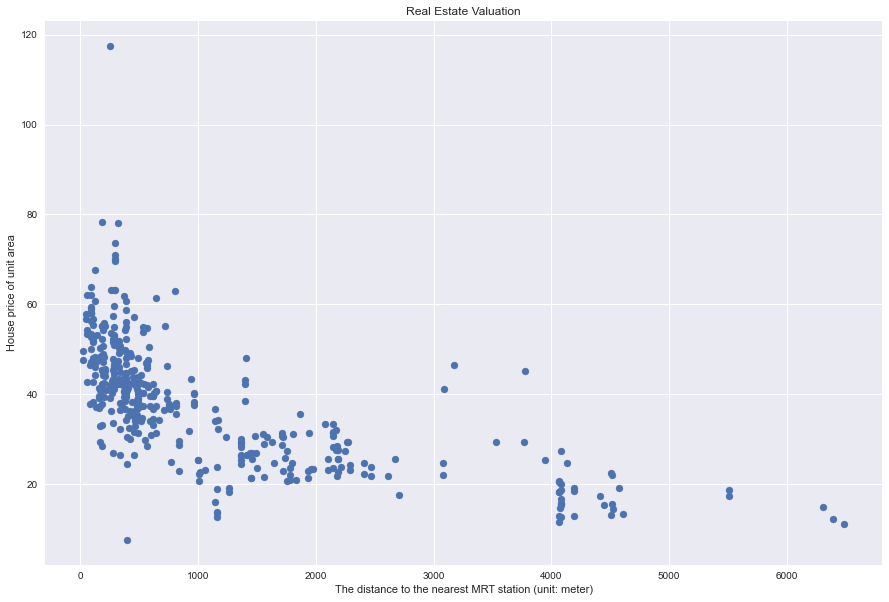

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

From the above visualiztions we can say that there is only realtion between Distance to nearset MRT station and the target variable House price so therefore, our feature will be distance 

In [36]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Data Modelling and Feature Selection

## Splitting Data into training and validtaion Set 

In [37]:
X = np.array(df['X3 distance to the nearest MRT station']).reshape(-1,1)
y = np.array(df['Y house price of unit area']).reshape(-1,1)

In [38]:
X[1]

array([306.5947])

In [39]:
y[1]

array([42.2])

In [40]:
len(X), len(y)

(414, 414)

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

y_train = y_train.reshape(len(y_train),)
y_valid = y_valid.reshape(len(y_valid),)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((331, 1), (83, 1), (331,), (83,))

## Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler
# Standardisation replaces the values by their Z scores.

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_train_Scaled = scaler.fit_transform(X_train) 
# y_train_Scaled = scaler.fit_transform(y_train) 

X_valid_Scaled = scaler.transform(X_valid) 
# y_valid_Scaled = scaler.transform(y_valid) 

## Data Modelling

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [45]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

## Cross validation

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

In [47]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regr, X_valid, y_valid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -6.206 (1.794)


## Prediction

In [48]:

regr.predict([[100]])

array([49.1385311])

## From the above prediction we can say that my house price of unit area is 49.13